# Rohan Pawar 20BAI1201

In [1]:
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline


## Printing Sample Photos from the folder

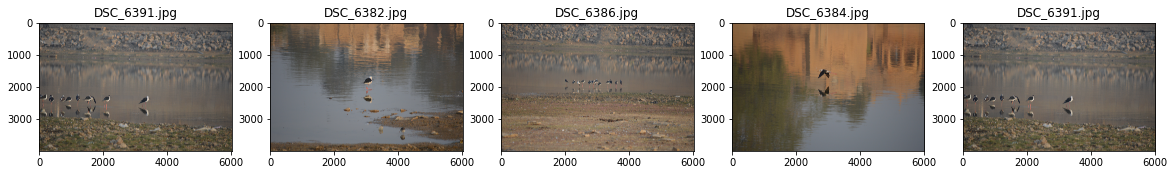

In [2]:
plt.figure(figsize=(20,20))

trial_folder=r'D:\VIT\Summer Course 2023\Assignments\Bird_data\train_data\train_data\blasti'

for i in range(5):
    file = random.choice(os.listdir(trial_folder))
    image_path= os.path.join(trial_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
val_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [4]:
# creating a new generator
# loading train data
train = train_gen.flow_from_directory(r"D:\VIT\Summer Course 2023\Assignments\Bird_data\train_data\train_data", class_mode="categorical", shuffle=False, batch_size=10, target_size=(640, 480))
# loading val data
val = val_gen.flow_from_directory(r"D:\VIT\Summer Course 2023\Assignments\Bird_data\test_data\test_data", class_mode="categorical", shuffle=False, batch_size=10, target_size=(640, 480))

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [5]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(640, 480, 3)))

# 1st convolutional block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd convolutional block
model.add(Conv2D(50, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# Adding Dropout
model.add(Dropout(0.2))
# Adding Batch Normalisation
model.add(BatchNormalization())
# 3rd convolutional block
model.add(Conv2D(75, (2, 2), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# Flattening layer
model.add(Flatten())
# Fully Connected Layer block
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
# Output layer
model.add(Dense(units=16, activation='softmax'))


### Compiling Model

In [21]:
# Compiling model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [24]:
# fitting data for 10 epochs
model.fit(train,batch_size=8,validation_data=val,epochs=20,callbacks=early_stop)

Epoch 1/20
15/15 [==============================] - 38s 3s/step - loss: 3.4641 - accuracy: 0.0467 - val_loss: 2.7507 - val_accuracy: 0.1401
Epoch 2/20
15/15 [==============================] - 35s 2s/step - loss: 2.8286 - accuracy: 0.1400 - val_loss: 2.7717 - val_accuracy: 0.1274
Epoch 3/20
15/15 [==============================] - 36s 2s/step - loss: 2.6251 - accuracy: 0.2333 - val_loss: 2.8670 - val_accuracy: 0.1210
Epoch 4/20
15/15 [==============================] - 36s 2s/step - loss: 2.3176 - accuracy: 0.2600 - val_loss: 3.1748 - val_accuracy: 0.1401
Epoch 5/20
15/15 [==============================] - 36s 2s/step - loss: 2.1471 - accuracy: 0.3000 - val_loss: 3.3782 - val_accuracy: 0.0637
Epoch 6/20
15/15 [==============================] - 36s 2s/step - loss: 1.9022 - accuracy: 0.3733 - val_loss: 3.4895 - val_accuracy: 0.1019
Epoch 7/20
15/15 [==============================] - 36s 2s/step - loss: 1.4446 - accuracy: 0.4933 - val_loss: 5.4689 - val_accuracy: 0.0382
Epoch 8/20
15/15 [==

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 320, 240, 25)      1900      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 160, 120, 25)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 80, 60, 50)        11300     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 40, 30, 50)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 40, 30, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 40, 30, 50)      

In [49]:
from tensorflow.keras.preprocessing import image
from  matplotlib import pyplot as plt


In [ ]:
model.save('birdWeights.h5')

### Testing with custom input

In [52]:
img = image.load_img(r'D:\VIT\Summer Course 2023\Assignments\Bird_data\test_data\test_data\indvul\DSC_1263.jpg',target_size=(640,480))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(model.predict(img))
print(pred)
output = ['blasti',
 'bonegl',
 'brhkyt',
 'cbrtsh',
 'cmnmyn',
 'gretit',
 'hilpig',
 'himbul',
 'himgri',
 'hsparo',
 'indvul',
 'jglowl',
 'lbicrw',
 'mgprob',
 'rebimg',
 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 20ms/step
10
indvul
